# MODEL BUILDING

## Price Predection Model 💸

## import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from catboost import CatBoostRegressor
import pickle

In [2]:
data = pd.read_csv('../dataSet/cleaned_car_data2.csv')
data.head()

,name,manufacturer,year,age,kilometerage,engine,transmission,price
0,Ford Fiesta,FORD,2003,22,175418,Petrol,Automatic,1500
1,Vauxhall Corsa,VAUXHALL,2003,22,175418,Petrol,Automatic,1500
2,Vauxhall Zafira,VAUXHALL,2003,22,175418,Petrol,Automatic,1500
3,Peugeot 107,PEUGEOT,2003,22,175418,Petrol,Automatic,1500
4,Vauxhall Corsa,VAUXHALL,2003,22,175418,Petrol,Automatic,1500


## drop the name and year columns because it is irrelevant in our model building

In [3]:
data = data.drop(['year'], axis=1)

In [4]:
data.head()

,name,manufacturer,age,kilometerage,engine,transmission,price
0,Ford Fiesta,FORD,22,175418,Petrol,Automatic,1500
1,Vauxhall Corsa,VAUXHALL,22,175418,Petrol,Automatic,1500
2,Vauxhall Zafira,VAUXHALL,22,175418,Petrol,Automatic,1500
3,Peugeot 107,PEUGEOT,22,175418,Petrol,Automatic,1500
4,Vauxhall Corsa,VAUXHALL,22,175418,Petrol,Automatic,1500


In [5]:
data['name'].unique()

array(['Ford Fiesta', 'Vauxhall Corsa', 'Vauxhall Zafira', 'Peugeot 107',
       'Bmw X5', 'Honda Civic', 'Ford Focus', 'Mazda 3', 'Peugeot 207',
       'Kia Ceed', 'Bmw 3 Series', 'Nissan Micra', 'Renault Clio',
       'Fiat 500', 'Audi A6', 'Honda Cr-V', 'Citroen C1',
       'Vauxhall Astra', 'Volvo C30', 'Ford Fusion', 'Suzuki Swift',
       'Peugeot 308', 'Fiat Punto', 'Vauxhall Meriva', 'Kia Picanto',
       'Citroen C4', 'Ford Ka', 'Toyota Yaris', 'Volkswagen Polo',
       'Nissan Note', 'Toyota Aygo', 'Honda Jazz', 'Seat Ibiza',
       'Dacia Sandero', 'Citroen C3', 'Mini Hatch', 'Fiat Panda',
       'Ford C-Max', 'Ford Mondeo', 'Skoda Fabia', 'Mazda Mazda 6',
       'Peugeot 3008', 'Ford Transit Connect', 'Nissan Qashqai',
       'Kia Soul', 'Skoda Roomster', 'Mercedes-Benz C Class',
       'Suzuki Sx4', 'Renault Scenic', 'Bmw 1 Series', 'Ford S-Max',
       'Mazda Mazda 2', 'Mercedes-Benz A Class', 'Mercedes-Benz Vito',
       'Volkswagen Beetle', 'Kia Rio', 'Land Rover Freela

# label encode the categorical values

In [6]:
le_name = LabelEncoder()
le_manufacturer = LabelEncoder()
le_engine = LabelEncoder()
le_transmission = LabelEncoder()
data['name'] = le_name.fit_transform(data['name'])
data['manufacturer'] = le_manufacturer.fit_transform(data['manufacturer'])
data['engine'] = le_engine.fit_transform(data['engine'])
data['transmission'] = le_transmission.fit_transform(data['transmission'])

In [7]:
data.tail(
)

,name,manufacturer,age,kilometerage,engine,transmission,price
63968,63,4,5,50404,3,0,84995
63969,466,41,2,4184,2,0,84995
63970,572,43,2,3057,0,0,84995
63971,398,34,3,12824,3,0,85000
63972,79,5,1,7903,2,0,85000


In [8]:
print(data['name'].unique()) 
print(data[data['name'] == 1].shape[0])

[149 506 523 374  98 178 153 266 378 217  70 363 411 135  19 179 104 501
 579 157 458 382 142 514 224 108 161 494 555 365 469 184 426 128 105 347
 141 145 164 433 273 380 174 371 228 442 291 459 419  65 170 272 285 330
 529 226 240  10 114 537  76 416 368 391 427 189 468 107 231 491 279 467
 392 553   9   3 581 379 592 188 513  13 521 341 276  59 452 229 274 447
 372 448 251 421 385 116 438 129 476 499  95 196 485 110 323 301 275 136
 299 559 126 503 342 177 351 197 449 570 429 361 190 584 199  21 286 302
 242 300 577 267  15 102 113 456 393 483 264 413 292 163 358 144 373 278
 386 348 210 227  20 571 139 500 534 515 357 356 451 362 213 241 152  93
 353 159 530 281 289 345 256  78 453 103 284 326 115 344 200  16 502   2
 375 290 158 282 394 211 441 590 558 376 431 460 566 520 531 335 444 493
 524 137 130 585 578 223 498 270 583 446 245 420 370 109 321 387 191 162
 132 214 410 322 203 143 324 295 173   7 280 352 146  17 455 327 192 138
 225 366  39 383 415 175 422 450 517 388 461 484 28

In [9]:
# creating X and y variables
X = data.drop(['price'], axis=1)
y = data['price'] * 10
X.tail()
y.tail()

63968    849950
63969    849950
63970    849950
63971    850000
63972    850000
Name: price, dtype: int64

In [10]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((51178, 6), (12795, 6), (51178,), (12795,))

### feature scale the X_train and X_test values


In [12]:

norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)

print(X_train)
print('\n')
print(X_test)

[[0.41385135 0.47727273 0.06896552 0.05920718 0.75       0.        ]
 [0.41385135 0.47727273 0.05172414 0.10565517 0.5        0.        ]
 [0.18074324 0.13636364 0.18965517 0.31697242 0.         0.5       ]
 ...
 [0.36655405 0.45454545 0.03448276 0.01961997 0.75       0.5       ]
 [0.9375     0.97727273 0.12068966 0.09467033 0.75       0.5       ]
 [0.05912162 0.06818182 0.05172414 0.05696633 0.         1.        ]]


[[0.28040541 0.27272727 0.05172414 0.13920573 0.25       0.        ]
 [0.41047297 0.47727273 0.         0.02095377 0.         0.        ]
 [0.34628378 0.40909091 0.0862069  0.06895324 0.         0.        ]
 ...
 [0.80743243 0.93181818 0.06896552 0.07907422 0.75       0.5       ]
 [0.33783784 0.31818182 0.05172414 0.06765746 0.75       0.5       ]
 [0.69425676 0.79545455 0.31034483 0.39482687 0.         0.5       ]]


In [13]:
# models = {
#     'linear_model': LinearRegression(),
#     'lgbm_model': LGBMRegressor(random_state = 123),
#     'rf_model': RandomForestRegressor(
#         random_state=123,
#         n_estimators=200,
#         max_depth=12,
#         min_samples_leaf=5 
#     ),
#     'xgboost_model': XGBRegressor(
#         random_state=123,
#         n_estimators=200,
#         max_depth=8,
#         learning_rate=0.05,
#         tree_method='hist' # Faster training
#     ),
#     'ridge_model': Ridge(
#         random_state=123,
#         alpha=1.0          # Default regularization strength
#     ),
#     'catboost_model': CatBoostRegressor(
#         random_state=123,
#         verbose=0  # Suppress output during training
#     )
# }

In [14]:
# def train_model(models: dict) -> pd.DataFrame:
#     my_dict = {}
#     name_list, train_score_list, r_sqd_list, mae_list, rmse_list = [], [], [], [], []
#     for name, estimator in models.items():
#         # fit
#         estimator.fit(X_train, y_train)

#         # make predictions
#         y_pred = estimator.predict(X_test)

#         # metrics
#         train_score = estimator.score(X_train, y_train)
#         r_sqd = metrics.r2_score(y_test, y_pred)
#         mae = metrics.mean_absolute_error(y_test, y_pred)
#         mse = metrics.mean_squared_error(y_test, y_pred)
#         rmse = np.sqrt(mse)

#         # add the metrics to the empty list
#         name_list.append(name)
#         train_score_list.append(train_score)
#         r_sqd_list.append(r_sqd)
#         mae_list.append(mae)
#         rmse_list.append(rmse)

#     my_dict["Name"] = name_list
#     my_dict["Train_Score"] = train_score_list
#     my_dict["R_squared"] = r_sqd_list
#     my_dict["Mean_absolute_error"] = mae_list
#     my_dict["Root_mean_sqd_error"] = rmse_list

#     my_dataframe = pd.DataFrame(my_dict)
#     my_dataframe = my_dataframe.sort_values("Root_mean_sqd_error")
#     return my_dataframe

In [ ]:
# train_model(models)

NameError: name 'train_model' is not defined

Based onmodel performance results, I notice that XGBoost is currently the best performing model with an R-squared of 0.882062. Since we are mainly looking to optimize the hyperparameter tuning, I'll use grid search that are more focused on XGBoost's parameters

In [16]:
# grid = {
#     'colsample_bytree': [0.6, 0.7, 0.8],
#     'learning_rate': [0.01, 0.05, 0.1], 
#     'max_depth': [9, 12, 14],   
#     'min_child_weight': [1, 5, 10],
#     'n_estimators': [150, 250, 350],    
#     'subsample': [0.7, 0.8, 0.9],
#     'gamma': [0, 0.1, 0.2],               
#     'reg_alpha': [0, 0.01, 0.1],          
#     'reg_lambda': [1, 1.5, 2]             
# }

# model = GridSearchCV(
#     estimator=XGBRegressor(
#         random_state=123,
#         tree_method='hist'  # Keep the fast training method
#     ),
#     param_grid=grid,
#     scoring='neg_root_mean_squared_error',
#     cv=5,
#     verbose=1,
#     n_jobs=-1 
# )


# Best parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 350, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 0.8}

grid = {
    'colsample_bytree': [0.7],  # Fraction of features to be used for each tree
    'learning_rate': [0.1],   # Step size shrinkage used to prevent overfitting
    'max_depth': [9],             # Maximum depth of a tree
    'min_child_weight': [1],       # Minimum sum of instance weight (hessian) needed in a child
    'n_estimators': [350],      # Number of boosting rounds
    'subsample': [0.8],         # Fraction of samples to be used for each tree
    'gamma': [0],               # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0.1],          # L1 regularization term on weights
    'reg_lambda': [1.5]             # L2 regularization term on weights
}

model = GridSearchCV(
    estimator=XGBRegressor(
        random_state=123,
        tree_method='hist'  # Keep the fast training method
    ),
    param_grid=grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1 
)

### Train the model

In [17]:
model.fit(X_train,y_train, verbose = 1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=123, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'gamma': [0],
                         'learning_rate': [0.1], 'max_depth': [9],
                         'min_child_weight': [1], 'n_estimators': [350],
                         'reg_alpha': [0.1], 'reg_lambda': [1.5],
                         'subsample': [0.8]},
             scoring='neg_root_mean_squared_error', verbose=1)

### The best performing model is XGBoost with the following metrics and params

In [18]:
y_pred = model.predict(X_test)
print("Best parameters:", model.best_params_)
grid_model = pd.DataFrame({
    'model': ['XGboost'],
    'r_squared': [metrics.r2_score(y_test, y_pred)],
    'mae': [mean_absolute_error(y_test, y_pred)],
    'rmse': [np.sqrt(metrics.mean_squared_error(y_test, y_pred))],
    })
grid_model


Best parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 350, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 0.8}


,model,r_squared,mae,rmse
0,XGboost,0.900442,27788.980718,44859.44215


### Savingg the model

In [148]:
# data = {"model": model,"norm":norm}
# with open('../models/regressor2.pkl', 'wb') as file:
#     pickle.dump(data, file)

#### Make Predictions on new data.

In [19]:
import warnings
warnings.filterwarnings("ignore")
# Create test configurations using exact names from dataset
data = pd.read_csv('../dataSet/cleaned_car_data2.csv')

test_configurations = [
    ['Mercedes-Benz C Class', 'MERCEDES-BENZ', 5, 50000.0, 'Petrol', 'Automatic'],  # Luxury newer car
    ['Toyota Corolla', 'TOYOTA', 5, 50000.0, 'Petrol', 'Manual'],     # Economy newer car
    ['Bmw X5', 'BMW', 5, 50000.0, 'Diesel', 'Automatic'],            # Luxury SUV
    ['Dacia Sandero', 'DACIA', 5, 50000.0, 'Petrol', 'Manual'],      # Budget car
    ['Ford Fiesta', 'FORD', 5, 50000.0, 'Petrol', 'Manual'],         # Popular economy car
    ['Audi A5', 'AUDI', 5, 50000.0, 'Diesel', 'Automatic']           # Premium car
]

# Use the rest of the corrected code I provided earlier with these test configurations
# Fit the label encoders once with the training data
le_name.fit(data['name'])
le_manufacturer.fit(data['manufacturer'])
le_engine.fit(data['engine'])
le_transmission.fit(data['transmission'])

results = []
for config in test_configurations:
    try:
        # Create numpy array with the right shape
        new_data = np.zeros((1, 6))
        
        try:
            # Transform each feature using the appropriate encoder
            new_data[0, 0] = le_name.transform([config[0]])[0]  # Changed from fit_transform
            new_data[0, 1] = le_manufacturer.transform([config[1]])[0]
            new_data[0, 2] = float(config[2])  # age
            new_data[0, 3] = float(config[3])  # kilometerage
            new_data[0, 4] = le_engine.transform([config[4]])[0]
            new_data[0, 5] = le_transmission.transform([config[5]])[0]
        except ValueError as e:
            print(f"Warning: Unknown category in {config[0]}: {str(e)}")
            continue
            
        # Normalize using the same scaler used during training
        normalized_data = norm.transform(new_data)
        
        # Predict (removed the *10 multiplication)
        price = model.predict(normalized_data)
        
        results.append({
            'Car': config[0],
            'Manufacturer': config[1],
            'Age': config[2],
            'Mileage': f"{config[3]:,.0f}",
            'Engine': config[4],
            'Transmission': config[5],
            'Estimated Price': f"{price[0]:,.0f} MAD"  # Removed *10
        })
    except Exception as e:
        print(f"Error processing configuration {config}: {str(e)}")
        continue

# Display results
print("\nFeature Importance:")
best_estimator = model.best_estimator_
feature_importance = pd.DataFrame({
    'feature': ['name', 'manufacturer', 'age', 'kilometerage', 'engine', 'transmission'],
    'importance': best_estimator.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance)
print("\nPredictions:")
result_df = pd.DataFrame(results)
print(result_df)


Feature Importance:
        feature  importance
2           age    0.312235
5  transmission    0.276577
0          name    0.142982
1  manufacturer    0.115402
4        engine    0.085567
3  kilometerage    0.067238

Predictions:
                     Car   Manufacturer  Age Mileage  Engine Transmission  \
0  Mercedes-Benz C Class  MERCEDES-BENZ    5  50,000  Petrol    Automatic   
1         Toyota Corolla         TOYOTA    5  50,000  Petrol       Manual   
2                 Bmw X5            BMW    5  50,000  Diesel    Automatic   
3          Dacia Sandero          DACIA    5  50,000  Petrol       Manual   
4            Ford Fiesta           FORD    5  50,000  Petrol       Manual   
5                Audi A5           AUDI    5  50,000  Diesel    Automatic   

  Estimated Price  
0     337,626 MAD  
1     135,110 MAD  
2     456,601 MAD  
3     116,845 MAD  
4     117,951 MAD  
5     226,810 MAD  


## Combine training and test data

Combining the training and test datasets and then fitting the model on this combined dataset is generally not recommended for evaluating model performance. This approach can lead to overfitting, as the model has already seen the test data during training. However, this might be done for specific purposes such as:

Final Model Training: After selecting the best model and hyperparameters, you might want to train the final model on the entire dataset (both training and test data) to utilize all available data, which is our case.
Model Debugging: To check if the model can fit the data correctly without worrying about overfitting.
In practice, you should always evaluate your model on a separate test set that the model has not seen during training to get an unbiased estimate of its performance.

In [20]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.concatenate((y_train, y_test))

model.fit(X_combined, y_combined, verbose=1)

y_pred_combined = model.predict(X_combined)

grid_model = pd.DataFrame({
    'model': ['XGboost'],
    'r_squared': [metrics.r2_score(y_combined, y_pred_combined)],
    'mae': [mean_absolute_error(y_combined, y_pred_combined)],
    'rmse': [np.sqrt(metrics.mean_squared_error(y_combined, y_pred_combined))],
    })
grid_model

Fitting 5 folds for each of 1 candidates, totalling 5 fits


,model,r_squared,mae,rmse
0,XGboost,0.944807,21562.574913,33408.505345


Feature importance plot for the final model

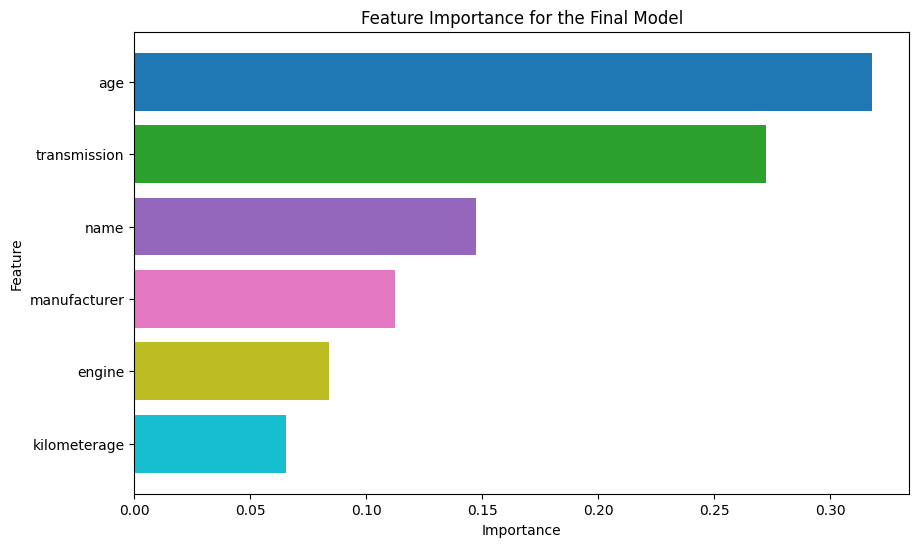

 #### Make Predictions on new data.

In [22]:
import warnings
warnings.filterwarnings("ignore")

test_configurations = [
    ['Mercedes-Benz C Class', 'MERCEDES-BENZ', 5, 50000.0, 'Petrol', 'Automatic'],  # Luxury newer car
    ['Toyota Corolla', 'TOYOTA', 5, 50000.0, 'Petrol', 'Manual'],     # Economy newer car
    ['Bmw X5', 'BMW', 5, 50000.0, 'Diesel', 'Automatic'],            # Luxury SUV
    ['Dacia Sandero', 'DACIA', 5, 50000.0, 'Petrol', 'Manual'],      # Budget car
    ['Ford Fiesta', 'FORD', 5, 50000.0, 'Petrol', 'Manual'],         # Popular economy car
    ['Audi A5', 'AUDI', 5, 50000.0, 'Diesel', 'Automatic']           # Premium car
]
# Fit the label encoders once with the training data
le_name.fit(data['name'])
le_manufacturer.fit(data['manufacturer'])
le_engine.fit(data['engine'])
le_transmission.fit(data['transmission'])

results = []
for config in test_configurations:
    try:
        new_data = np.zeros((1, 6))         # Create numpy array with the right shape
        try:
            # Transform each feature using the appropriate encoder
            new_data[0, 0] = le_name.transform([config[0]])[0]  # Changed from fit_transform
            new_data[0, 1] = le_manufacturer.transform([config[1]])[0]
            new_data[0, 2] = float(config[2])  # age
            new_data[0, 3] = float(config[3])  # kilometerage
            new_data[0, 4] = le_engine.transform([config[4]])[0]
            new_data[0, 5] = le_transmission.transform([config[5]])[0]
        except ValueError as e:
            print(f"Warning: Unknown category in {config[0]}: {str(e)}")
            continue
    
        # Normalizing
        normalized_data = norm.transform(new_data)
        
        # Predict
        price = model.predict(normalized_data)
        results.append({
            'Car': config[0],
            'Manufacturer': config[1],
            'Age': config[2],
            'Mileage': f"{config[3]:,.0f}",
            'Engine': config[4],
            'Transmission': config[5],
            'Estimated Price': f"{price[0]:,.0f} MAD"  # Removed *10
        })
    except Exception as e:
        print(f"Error processing configuration {config}: {str(e)}")
        continue

print("\nFeature Importance:")
best_estimator = model.best_estimator_
feature_importance = pd.DataFrame({
    'feature': ['name', 'manufacturer', 'age', 'kilometerage', 'engine', 'transmission'],
    'importance': best_estimator.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance)
print("\nPredictions:")
result_df = pd.DataFrame(results)
print(result_df)


Feature Importance:
        feature  importance
2           age    0.318155
5  transmission    0.272374
0          name    0.147472
1  manufacturer    0.112439
4        engine    0.083978
3  kilometerage    0.065582

Predictions:
                     Car   Manufacturer  Age Mileage  Engine Transmission  \
0  Mercedes-Benz C Class  MERCEDES-BENZ    5  50,000  Petrol    Automatic   
1         Toyota Corolla         TOYOTA    5  50,000  Petrol       Manual   
2                 Bmw X5            BMW    5  50,000  Diesel    Automatic   
3          Dacia Sandero          DACIA    5  50,000  Petrol       Manual   
4            Ford Fiesta           FORD    5  50,000  Petrol       Manual   
5                Audi A5           AUDI    5  50,000  Diesel    Automatic   

  Estimated Price  
0     340,715 MAD  
1     137,834 MAD  
2     447,784 MAD  
3     115,203 MAD  
4     114,733 MAD  
5     239,674 MAD  


### The model shows a slight performance improvement when trained on the combined dataset.

# Saving final model


In [124]:
# data = {"model": model,"norm":norm}
# with open('../models/regressorfinal.pkl', 'wb') as file:
#     pickle.dump(data, file)